In [5]:
import os
current_path = '/content/drive/My Drive/Colab Notebooks/Project_Stock/'

os.chdir(current_path)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc 
from math import sqrt 
import itertools
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from scipy.ndimage.filters import gaussian_filter1d
import warnings
# from scipy.ndimage.interpolation import shift

warnings.filterwarnings(action='ignore')
%tensorflow_version 1.x
%matplotlib inline


def min_max_scaler(x):
    scaled_x = (x - x.min()) / (x.max() - x.min())
    return scaled_x


def max_abs_scaler(x):
    scaled_x = x / abs(x).max()
    return scaled_x

  
def macd(df, short=12, long=26, signal=9):
    df['MACD'] = df['close'].ewm(span=short, min_periods=short - 1, adjust=False).mean() - \
                 df['close'].ewm(span=long, min_periods=long - 1, adjust=False).mean()
    df['MACD_Signal'] = df['MACD'].ewm(span=signal, min_periods=signal - 1, adjust=False).mean()
    df['MACD_OSC'] = df.MACD - df.MACD_Signal
    df['MACD_Zero'] = 0

    return

    
#           read reg ohlcv          #
file_path = 'ohlcv/'
file_list = os.listdir(file_path)

In [11]:
print(file_list[0])

2020-07-13 LOOM ohlcv.xlsx


2020-03-16 ELF ohlcv.xlsx


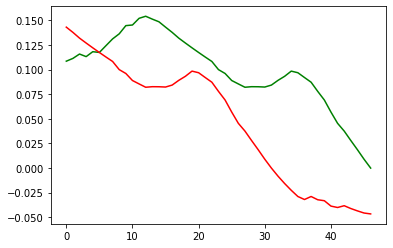

2020-03-16 CTXC ohlcv.xlsx


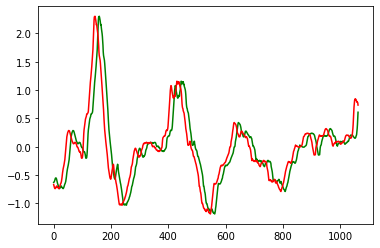

2020-03-16 DASH ohlcv.xlsx


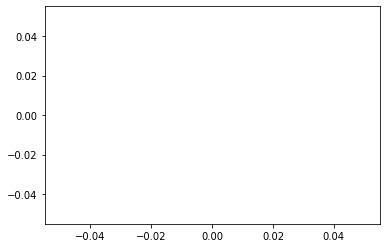

2020-03-16 ENJ ohlcv.xlsx


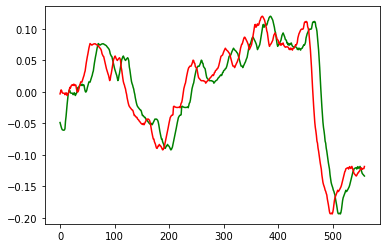

2020-03-16 DVP ohlcv.xlsx


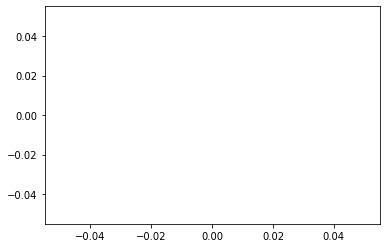

2020-03-16 EM ohlcv.xlsx


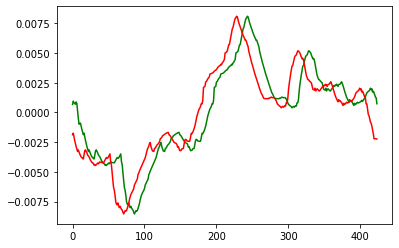

2020-03-16 DAD ohlcv.xlsx


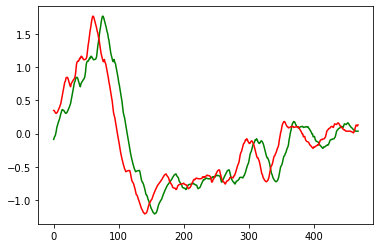

2020-03-16 DAC ohlcv.xlsx


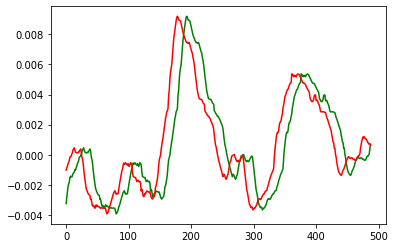

2020-03-16 EOS ohlcv.xlsx


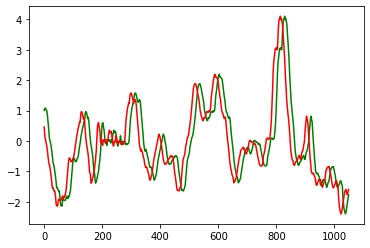

2020-03-16 ETC ohlcv.xlsx


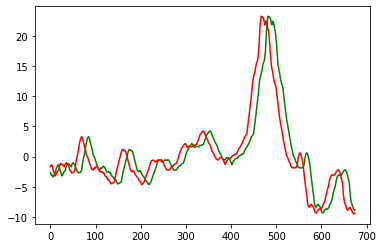

2020-03-16 GXC ohlcv.xlsx


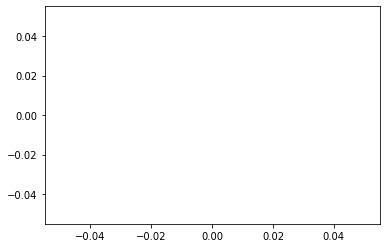

2020-03-16 FAB ohlcv.xlsx


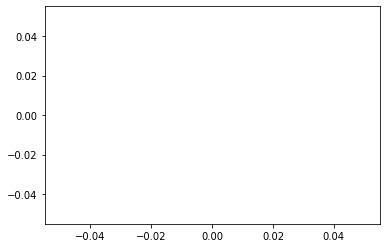

2020-03-16 FNB ohlcv.xlsx


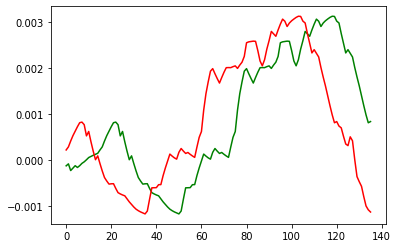

2020-03-16 ETZ ohlcv.xlsx


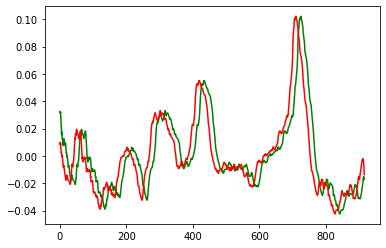

2020-03-16 FCT ohlcv.xlsx


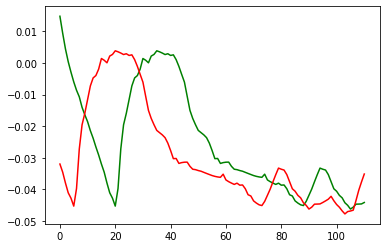

2020-03-16 FZZ ohlcv.xlsx


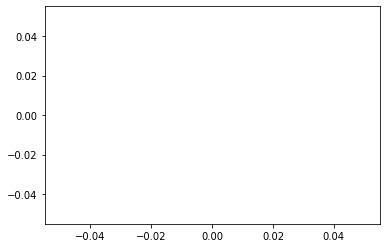

2020-03-16 FX ohlcv.xlsx


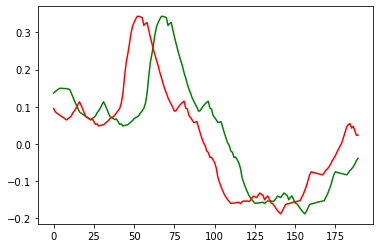

2020-03-16 GNT ohlcv.xlsx


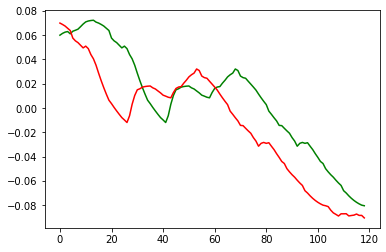

2020-03-16 ETH ohlcv.xlsx


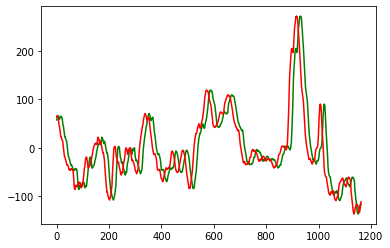

2020-03-16 HC ohlcv.xlsx


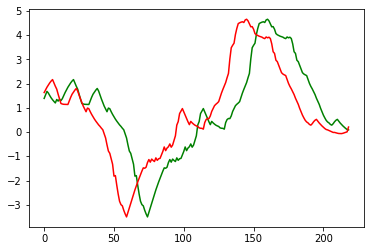

2020-03-16 HDAC ohlcv.xlsx


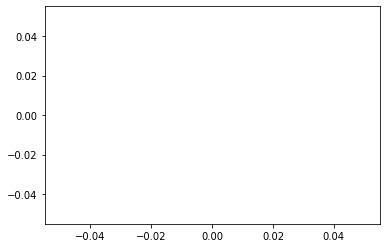

2020-03-16 HYC ohlcv.xlsx


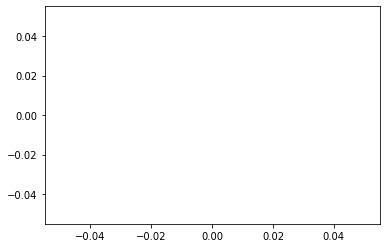

2020-03-16 ICX ohlcv.xlsx


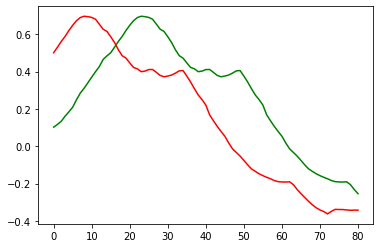

2020-03-16 IOST ohlcv.xlsx


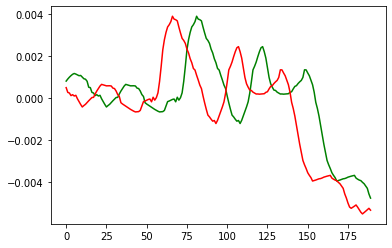

2020-03-16 IPX ohlcv.xlsx


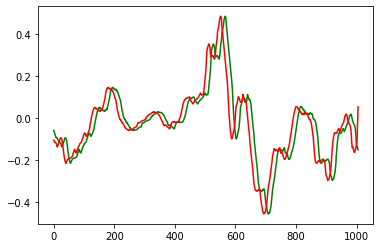

2020-03-16 INS ohlcv.xlsx


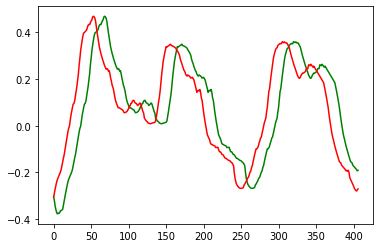

2020-03-16 LINK ohlcv.xlsx


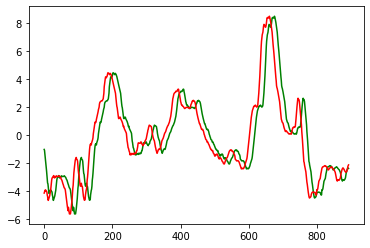

2020-03-16 ITC ohlcv.xlsx


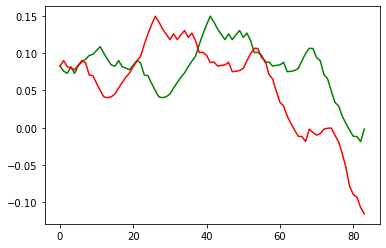

2020-03-16 LAMB ohlcv.xlsx


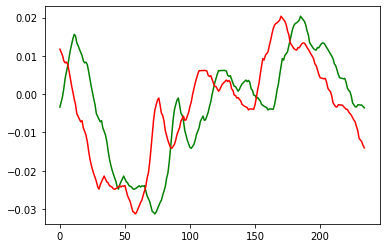

2020-03-16 LBA ohlcv.xlsx


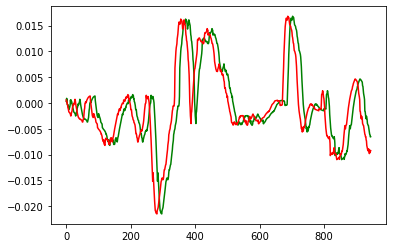

2020-03-16 KNC ohlcv.xlsx


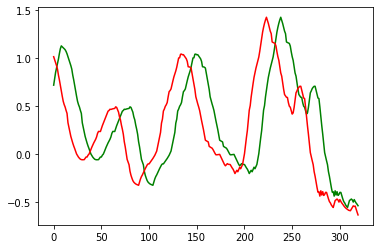

2020-03-16 LOOM ohlcv.xlsx


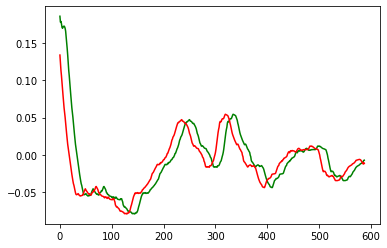

2020-03-16 LRC ohlcv.xlsx


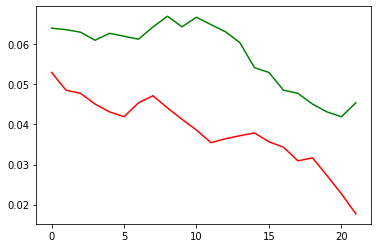

2020-03-16 OGO ohlcv.xlsx


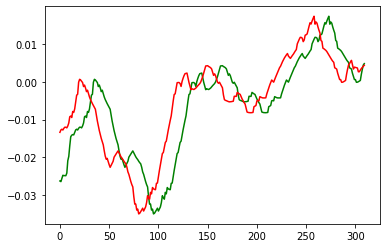

2020-03-16 MCO ohlcv.xlsx


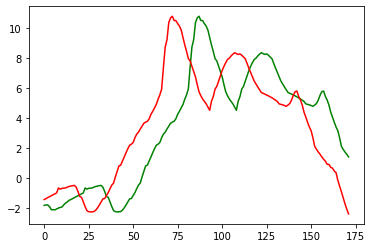

2020-03-16 LTC ohlcv.xlsx


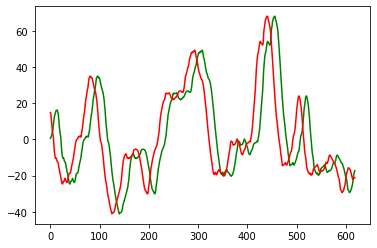

2020-03-16 LUNA ohlcv.xlsx


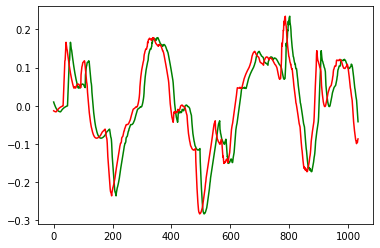

2020-03-16 MBL ohlcv.xlsx


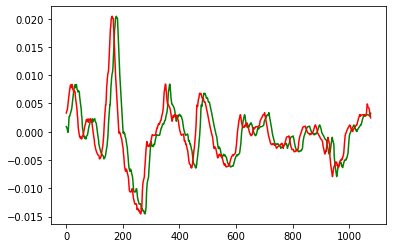

2020-03-16 OMG ohlcv.xlsx


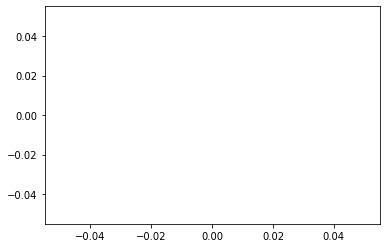

2020-03-16 MTL ohlcv.xlsx


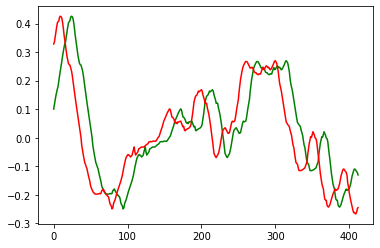

2020-03-16 MIX ohlcv.xlsx


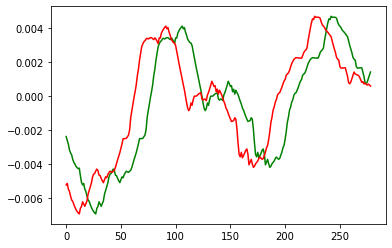

2020-03-16 MXC ohlcv.xlsx


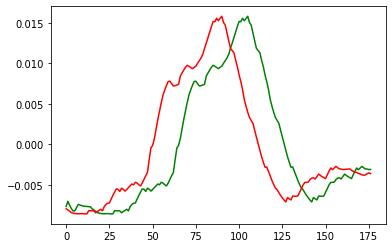

2020-03-16 NPXS ohlcv.xlsx


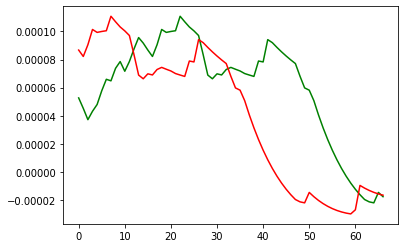

2020-03-16 ORBS ohlcv.xlsx


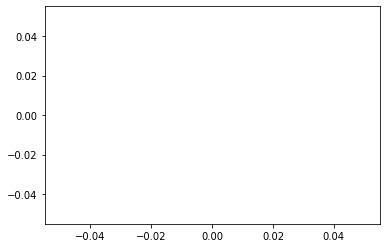

2020-03-16 PAY ohlcv.xlsx


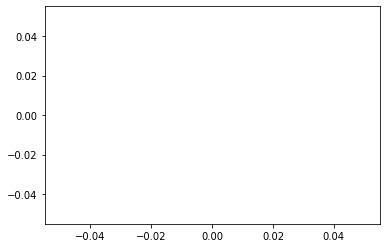

2020-03-16 RNT ohlcv.xlsx


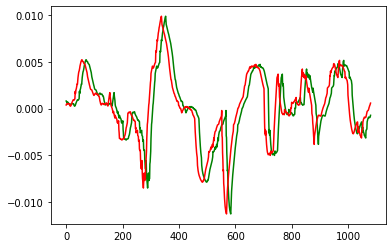

2020-03-16 REP ohlcv.xlsx


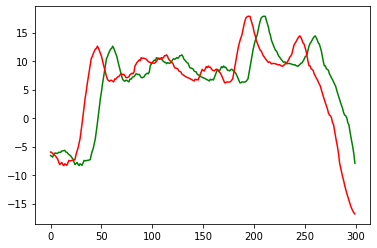

2020-03-16 POWR ohlcv.xlsx


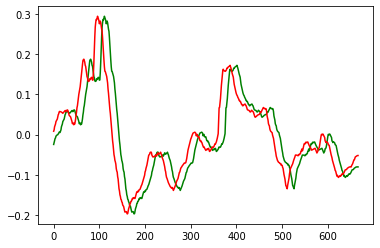

2020-03-16 PCM ohlcv.xlsx


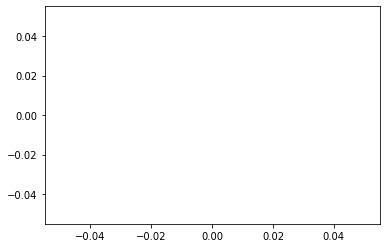

2020-03-16 PPT ohlcv.xlsx


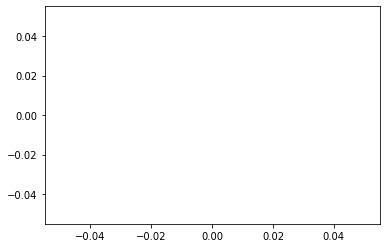

2020-03-16 QKC ohlcv.xlsx


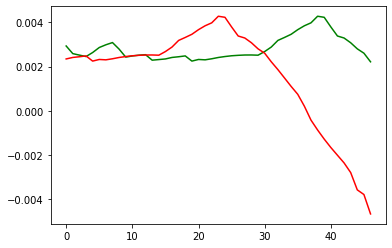

(7302, 10, 1)
(5477, 10, 1)
(5476, 10, 1)
(7302, 1)
(5477, 1)
(5476, 1)
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 10, 1)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 10, 32)            64        
_________________________________________________________________
activation_4 (Activation)    (None, 10, 32)            0         
_________________________________________________________________
dense_30 (Dense)             (None, 10, 64)            2112      
_________________________________________________________________
activation_5 (Activation)    (None, 10, 64)            0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 640)               0         
_____________________________________________________

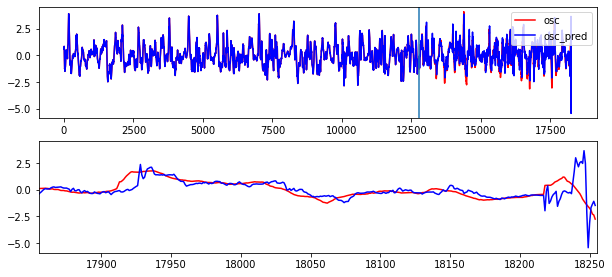

In [ ]:
input_data_length = 10
model_num = 108

short, long, signal = 105, 168, 32
sigma= 10
predict_size = 15
inverse = 0

# print(file_list)
# breakpoint

dataX, dataY = list(), list()
for i in range(len(file_list)):

  if i > 50:
    break

  file = file_list[i]
  print(file)

# file = file_list[0]
# print(file)
# breakpoint

  ohlcv_reg = pd.read_excel(file_path + file, index_col=0)
  macd(ohlcv_reg, short=short, long=long, signal=signal)
  # plt.plot(ohlcv_reg.iloc[:, [-2]])
  # macd(ohlcv_reg, short=150, long=300, signal=50)
  # plt.plot(ohlcv_reg.iloc[:, [-2]])
  # plt.show()
  # breakpoint

  ohlcv_reg['osc_reg'] = ohlcv_reg['MACD_OSC'].shift(-predict_size)
  # print(ohlcv_reg.iloc[:, -5:].tail(15))
  # breakpoint

  #     X_data : idl 만큼의 close? (일단),    Y_data : reg
  #     실시간으로 reg의 형태가 machine learning으로는 고정되지 않기 때문에,
  #     먼저 고정을 시키고, deep learning을 이용해 실시간으로 고정된 regression 결과를 뽑아낼 수 있는지 확인한다.
  #     충분히 가능성 있다.     #

  #         reg_target = close인 경우 앞의 데이터가 산다.       #  close/ close_reg
  if predict_size != 0:
    ohlcv_reg = ohlcv_reg.values[sum(ohlcv_reg.osc_reg.isna()):-predict_size, :] # 
  else:
    ohlcv_reg = ohlcv_reg.values[sum(ohlcv_reg.osc_reg.isna()):, :] # 

  reg_target = ohlcv_reg[:, [-3]].astype(np.float32)
  reg_result = ohlcv_reg[:, [-1]].astype(np.float32)
  # print(np.sum(np.isnan(reg_target)))
  # print(np.sum(np.isnan(reg_result)))
  # breakpoint
  # print(reg_target[-5:])
  # print(reg_result[-5:])
  plt.plot(reg_target, color='g')
  plt.plot(reg_result, color='r')
  plt.show()
  # breakpoint

  if len(reg_target) == 0:
    continue

  scaler_x = StandardScaler()
  scaler_y = StandardScaler()
  reg_target = scaler_x.fit_transform(reg_target)
  reg_result = scaler_y.fit_transform(reg_result)
  # reg_target = max_abs_scaler(reg_target)
  # reg_result = max_abs_scaler(reg_result)
  # print(reg_target, reg_result)
  # breakpoint

  # dataX, dataY = list(), list()
  for i in range(input_data_length, len(reg_target)):

    # group_x = reg_target[i - input_data_length: i]
    group_x = reg_target[i + 1 - input_data_length: i + 1]
    group_y = reg_result[i]
    # print(group_x[0])
    # quit()

    #   데이터 값에 결측치가 존재하는 경우 #
    if sum(sum(np.isnan(group_x))) > 0:
        continue

    if inverse == 1:
        dataX.append(group_x[::-1])  # dataX 리스트에 추가 [::-1]
    else:
        dataX.append(group_x)  # dataX 리스트에 추가 [::-1]
    dataY.append(group_y)

Made_X = np.array(dataX)
Made_Y = np.array(dataY)

# Made_X = np.array(reg_target)
# Made_Y = np.array(reg_result)
# print(Made_X.shape, Made_Y.shape)
# breakpoint  

# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(Made_X, Made_Y, test_size=0.4,
#                                                    shuffle=False)
# X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5,
#                                                    shuffle=False)

#     DATA CONTINOUS SPLIT    #
total_len = len(Made_X)
train_len = int(0.4 * total_len)
val_len = int(0.7 * total_len)

X_train = Made_X[:train_len]
X_val = Made_X[train_len:val_len]
X_test = Made_X[val_len:]
Y_train = Made_Y[:train_len]
Y_val = Made_Y[train_len:val_len]
Y_test = Made_Y[val_len:]
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)
# breakpoint

row = X_train.shape[1]
col = X_train.shape[2]

from keras.utils import plot_model
import keras.backend as K
from keras.models import Model, Sequential
import keras.layers as layers
from keras.layers import Dense, LSTM, Dropout, Input, Flatten
from keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta
from keras.regularizers import l1, l2
from sklearn.metrics import confusion_matrix
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
import tensorflow as tf

class Gelu(Activation):
    def __init__(self, activation, **kwargs):
        super(Gelu, self).__init__(activation, **kwargs)
        self.__name__='gelu'
        
def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))

get_custom_objects().update({'gelu': Gelu(gelu)})


def FER_Model(input_shape=(row, col)):

    # first input model
    visible = layers.Input(shape=input_shape, name='input')
    
    # net = layers.Dense(128)(visible)
    # # net = layers.LSTM(50, return_sequences=False)(net)
    # net = layers.Activation('gelu')(net)
    # # net = layers.LeakyReLU()(net)
    # net = layers.Dropout(0.3)(net)

    net = layers.Dense(32)(visible)
    # net = layers.LSTM(50, return_sequences=True)(visible)
    net = layers.Activation('gelu')(net)
    # net = layers.LeakyReLU()(net)
    # net = layers.Dropout(0.3)(net)

    
    net = layers.Dense(64)(net)
    # net = layers.LSTM(50, return_sequences=True)(net)
    net = layers.Activation('gelu')(net)
    # net = layers.LeakyReLU()(net)
    # net = layers.Dropout(0.3)(net)

  

    # net = layers.Dense(32)(net)
    # # net = layers.LSTM(64, return_sequences=False)(net)
    # net = layers.LeakyReLU()(net)
    # net = layers.Dropout(0.2)(net)

    net = layers.Flatten()(net)
    net = layers.Dense(64)(net)
    net = layers.Activation('gelu')(net)
    # net = layers.LeakyReLU()(net)

    net = layers.Dense(1)(net)

    # create model 
    model = Model(inputs =visible, outputs = net)
    # summary layers
    model.summary()

    return model

model = FER_Model()
# from keras.models import load_model
# model = load_model(gdrive_path + 'model/rapid_ascending %s_%s_ohlc.hdf5' % (input_data_length, model_num))

# opt = RMSprop(lr=0.05, rho=0.9,epsilon=1e-10)
opt = Adam(lr=0.0001, decay=1e-6)
# opt = Adadelta(lr=1., rho=0.95, epsilon=1e-13)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])
  
    
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
filepath = gdrive_path + "model/rapid_ascending %s_%s_ohlc.hdf5" % (input_data_length, model_num)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
checkpoint2 = TensorBoard(log_dir='Tensorboard_graph',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
checkpoint3 = EarlyStopping(monitor='val_loss', patience=30)
callbacks_list = [checkpoint, checkpoint2, checkpoint3]

# keras.callbacks.Callback 로 부터 log 를 받아와 history log 를 작성할 수 있다.

# we iterate 200 times over the entire training set
num_epochs = 1000
history = model.fit(X_train, Y_train,
                    epochs=num_epochs,
                    batch_size=64,
                    validation_data=(X_val, Y_val),
                    verbose=2,
                    callbacks=callbacks_list,
                    shuffle=False,
                    )

#         RESULT COMPARING    #
pred_reg = model.predict(X_test)
Y_pred = Made_Y.copy()
Y_pred[val_len:] = pred_reg

# span_list = list()
# span_list_y = list()
# for i in range(val_len, len(Y_pred)):
#     if Y_pred[i - 1] < Y_pred[i]:
#       span_list.append((i, i + 1))
#     if Made_Y[i - 1] < Made_Y[i]:
#       span_list_y.append((i, i + 1))

plt.figure(figsize=(10, 7))
plt.subplot(311)
# if inverse == 1:
#     plt.plot(Made_X[:, [0]].reshape(-1, 1), color='g', label='MACD_OSC') #   if [::-1], [0]
# else:
#     plt.plot(Made_X[:, [-1]].reshape(-1, 1), color='g', label='MACD_OSC')
plt.plot(Made_Y, color='r', label='osc')
plt.plot(Y_pred, color='b', label='osc_pred')
plt.axvline(x=val_len)
# for i in range(len(span_list)):
#     plt.axvspan(span_list[i][0], span_list[i][1], facecolor='y', alpha=0.5)

# plt.title('Gaussian_PRED', color='white')
plt.legend(loc='upper right')

plt.subplot(312)
plt.plot(Made_Y, color='r', label='osc')
plt.plot(Y_pred, color='b', label='osc_pred')
# for i in range(len(span_list)):
    # plt.axvspan(span_list[i][0], span_list[i][1], facecolor='y', alpha=0.5)
# plt.xlim(val_len, len(Y_pred))
plt.xlim(len(Y_pred)-400, len(Y_pred))

# plt.subplot(313)
# plt.plot(Made_Y, color='r', label='osc')
# for i in range(len(span_list)):
#     plt.axvspan(span_list[i][0], span_list[i][1], facecolor='y', alpha=0.5)
# for i in range(len(span_list_y)):
#     plt.axvspan(span_list_y[i][0], span_list_y[i][1], facecolor='c', alpha=0.5)
# plt.xlim(val_len, len(Y_pred))

plt.show()


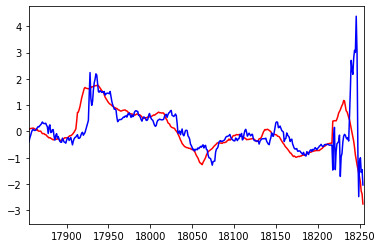

In [ ]:
plt.plot(Made_Y, color='r', label='osc')
plt.plot(Y_pred, color='b', label='osc_pred')
# for i in range(len(span_list)):
    # plt.axvspan(span_list[i][0], span_list[i][1], facecolor='y', alpha=0.5)
# plt.xlim(val_len, len(Y_pred))
plt.xlim(len(Y_pred)-400, len(Y_pred))

# plt.subplot(313)
# plt.plot(Made_Y, color='r', label='osc')
# for i in range(len(span_list)):
#     plt.axvspan(span_list[i][0], span_list[i][1], facecolor='y', alpha=0.5)
# for i in range(len(span_list_y)):
#     plt.axvspan(span_list_y[i][0], span_list_y[i][1], facecolor='c', alpha=0.5)
# plt.xlim(val_len, len(Y_pred))

plt.show()

2019-10-14 TRX ohlcv.xlsx


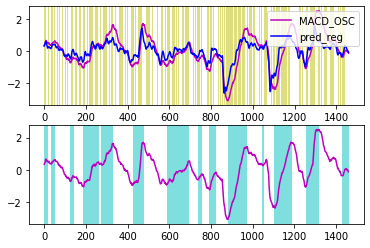

In [ ]:
file = file_list[3]
print(file)
inverse = 0

ohlcv_reg = pd.read_excel(file_path + file, index_col=0)
macd(ohlcv_reg, short=short, long=long, signal=signal)
ohlcv_reg['osc_reg'] = gaussian_filter1d(ohlcv_reg['MACD_OSC'], sigma=10)
# print(ohlcv_reg.iloc[:, [-1]])
# breakpoint

#     X_data : idl 만큼의 close? (일단),    Y_data : reg
#     실시간으로 reg의 형태가 machine learning으로는 고정되지 않기 때문에,
#     먼저 고정을 시키고, deep learning을 이용해 실시간으로 고정된 regression 결과를 뽑아낼 수 있는지 확인한다.
#     충분히 가능성 있다.     #

#         reg_target = close인 경우 앞의 데이터가 산다.       #  close/ close_reg
ohlcv_reg = ohlcv_reg.values[sum(ohlcv_reg.osc_reg.isna()):, :]
reg_target = ohlcv_reg[:, [-3]].astype(np.float32)
reg_result = ohlcv_reg[:, [-1]].astype(np.float32)
# print(reg_result)
# print(np.sum(np.isnan(reg_target)))
# print(np.sum(np.isnan(reg_result)))
# breakpoint

scaler_x = StandardScaler()
scaler_y = StandardScaler()
reg_target = scaler_x.fit_transform(reg_target)
reg_result = scaler_y.fit_transform(reg_result)
# reg_target = max_abs_scaler(reg_target)
# reg_result = max_abs_scaler(reg_result)
# print(reg_target, reg_result)
# breakpoint

dataX, dataY = list(), list()
for i in range(input_data_length, len(reg_target)):

  # group_x = reg_target[i - input_data_length: i]
  group_x = reg_target[i + 1 - input_data_length: i + 1]
  # group_x = gaussian_filter1d(reg_target[i + 1 - input_data_length: i + 1], sigma=sigma)
  group_y = reg_result[i]
  # print(group_x[0])
  # quit()

  #   데이터 값에 결측치가 존재하는 경우 #
  if sum(sum(np.isnan(group_x))) > 0:
      continue

  if inverse == 1:
    dataX.append(group_x[::-1])  # dataX 리스트에 추가
  else:
    dataX.append(group_x)
  dataY.append(group_y)

Made_X = np.array(dataX)
Made_Y = np.array(dataY)

# Made_X = np.array(reg_target)
# Made_Y = np.array(reg_result)

# from keras.models import load_model
# model = load_model(gdrive_path + 'model/rapid_ascending %s_%s_ohlc.hdf5' % (input_data_length, model_num))

pred_reg = model.predict(Made_X)

span_list = list()
span_list_y = list()
for i in range(1, len(pred_reg)):
    if pred_reg[i - 1] < pred_reg[i]:
      span_list.append((i, i + 1))
    if Made_Y[i - 1] < Made_Y[i]:
      span_list_y.append((i, i + 1))

plt.subplot(211)
if inverse == 1:
  plt.plot(Made_X[:, [0]].reshape(-1, 1), color='m', label='MACD_OSC')
else:
  plt.plot(Made_X[:, [-1]].reshape(-1, 1), color='m', label='MACD_OSC')
  
plt.plot(pred_reg, color='b',  label='pred_reg')
plt.legend(loc='upper right')
for i in range(len(span_list)):
    plt.axvspan(span_list[i][0], span_list[i][1], facecolor='y', alpha=0.5)

plt.subplot(212)
if inverse == 1:
  plt.plot(Made_X[:, [0]].reshape(-1, 1), color='m', label='MACD_OSC')
else:
  plt.plot(Made_X[:, [-1]].reshape(-1, 1), color='m', label='MACD_OSC')
for i in range(len(span_list_y)):
    plt.axvspan(span_list_y[i][0], span_list_y[i][1], facecolor='c', alpha=0.5)


plt.show()